# Eintscheidungsgrenze bei der Logistischen Regression

In [1]:
import pandas as pd

df = pd.read_csv("../classification.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [2]:
from sklearn.model_selection import train_test_split

X = df[["age", "interest"]].values
y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.88


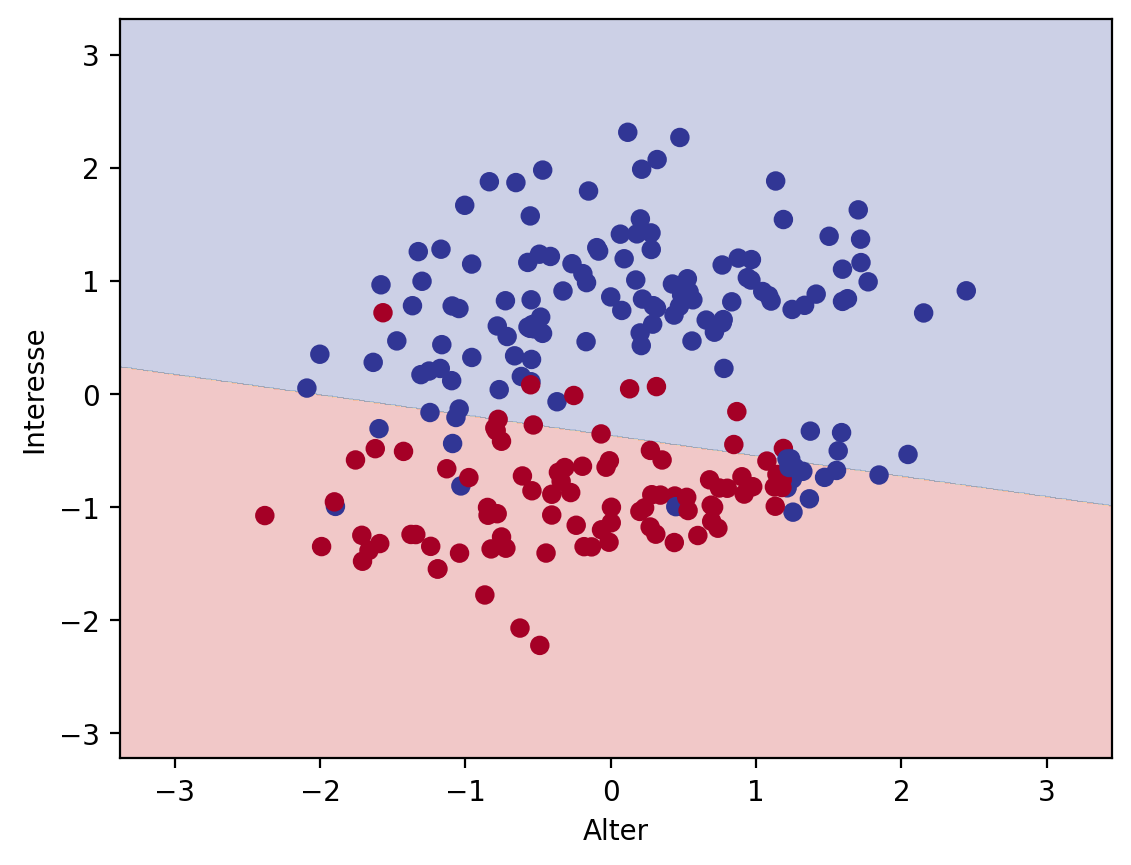

In [6]:
# Hinweis: Damit dieser Befehl funktioniert, muss die 
# "helper.py" - Datei im selben Ordner liegen, wie das
# aktuelle Jupyter Notebook

from helper import plot_classifier

# Trainings-Daten plotten
plot_classifier(model, X_train, y_train, proba = False, xlabel = "Alter", ylabel = "Interesse")
#blau ist True,   rot ist False
#Man sieht nun die Punkte vor falschem Farbhintergrund.

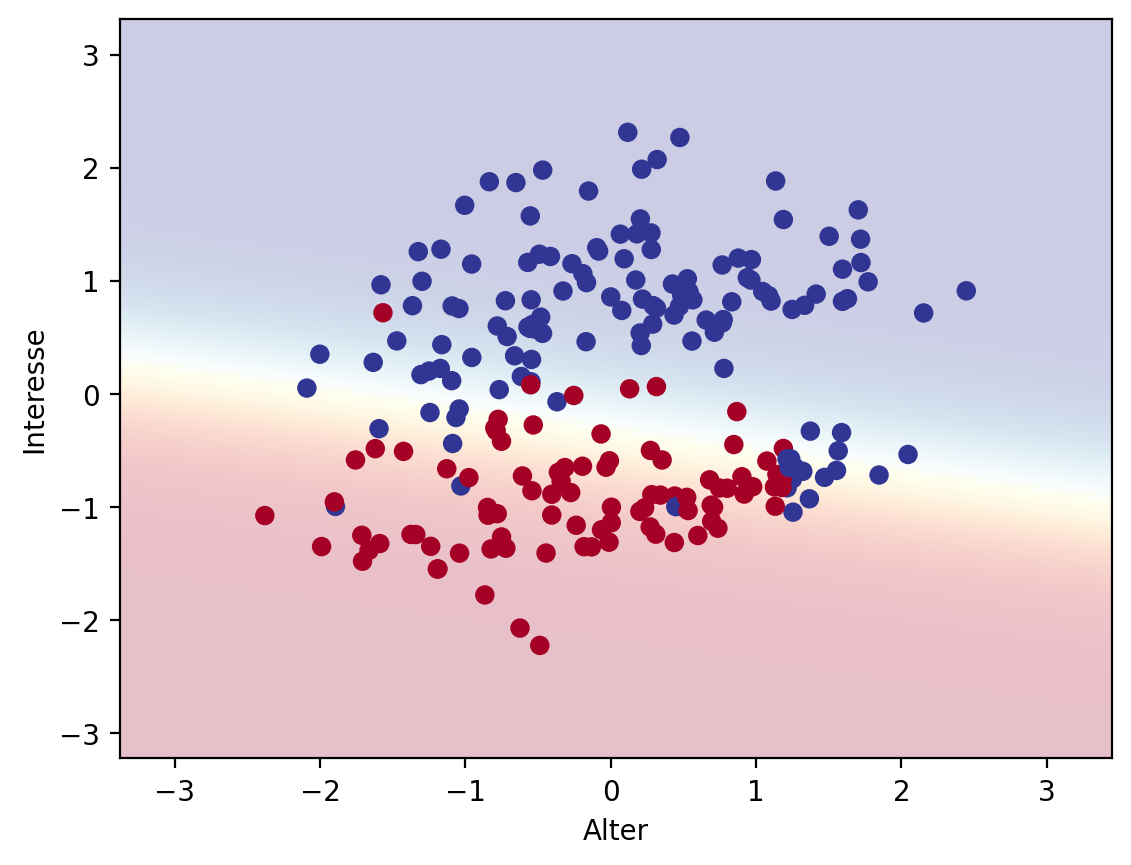

In [7]:
#Mit proba=True kann man den Übergangsbereich visualsisieren. Das ist der Bereich, 
#wo sich das Modell sozusagen unsicherer ist als in den Bereichen entfernt von der Mitte 
plot_classifier(model, X_train, y_train, proba = True, xlabel = "Alter", ylabel = "Interesse")

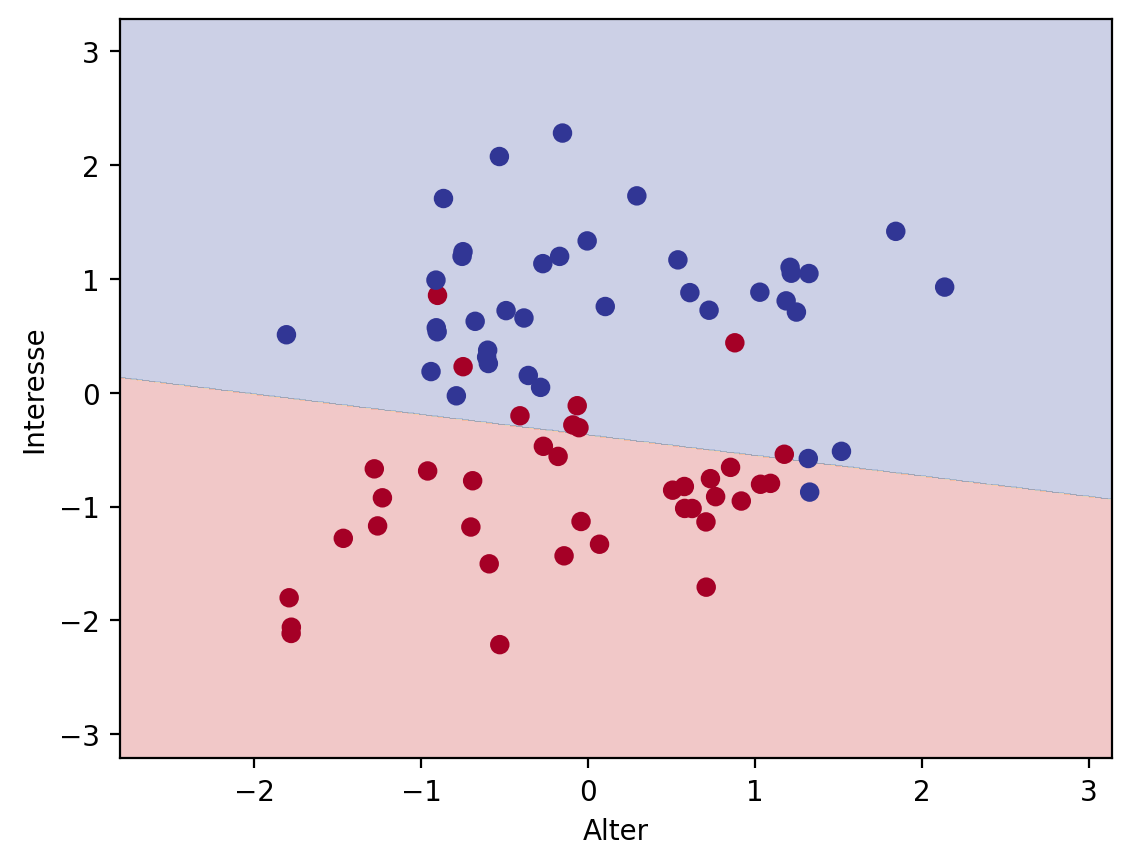

In [8]:
# Testdaten plotten

plot_classifier(model, X_test, y_test, proba = False, xlabel = "Alter", ylabel = "Interesse")

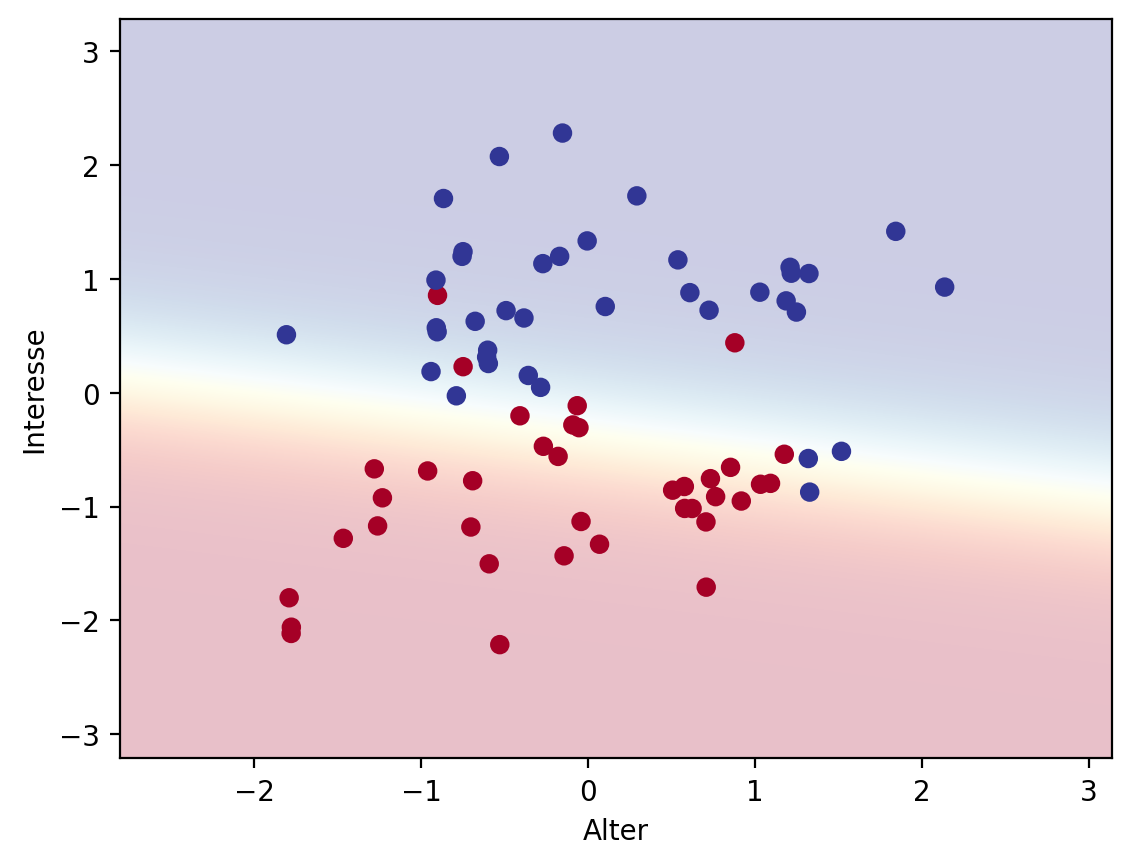

In [9]:
plot_classifier(model, X_test, y_test, proba = True, xlabel = "Alter", ylabel = "Interesse")

In [ ]:
# ...es gibt wenige Falschzuweisungen außerhalb des Übergangsbereichs.

## Was macht helper.py eigentlich?

In [ ]:
#Man kann helper.py auch hier ins Notebook per copy&paste ziehen, dann können
#wir leichter Änderungen und Einblicke realisieren
#Achtung! - Nach dem Ausführen dieses Blocks die obigen Notes nicht mehr ausführen,
# sonst kommt es zu einer Rekursion

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    #die folgenden 2 Zeilen würde man in Jupyter als 
    # %matplotlib inline usw. einfügen
    get_ipython().magic('matplotlib inline')
    get_ipython().magic('config InlineBackend.figure_formats = set(["retina"])')
except NameError:
    pass

def plot_classifier(model, X, Z, proba = False, xlabel = None, ylabel = None):
    # https://matplotlib.org/examples/color/colormaps_reference.html
    plt.set_cmap("RdYlBu")
    
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 1000),
        np.linspace(y_min, y_max, 1000)
    )
    
    if proba:
        zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        plt.imshow(zz.reshape(xx.shape), 
                   origin = "lower", 
                   aspect = "auto", 
                   extent = (x_min, x_max, y_min, y_max), 
                   vmin = 0, 
                   vmax = 1, 
                   alpha = 0.25)
    else: 
        zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
        plt.contourf(xx, yy, zz.reshape(xx.shape), 
                     alpha = 0.25, #duchsichtig....
                     vmin = 0, 
                     vmax = 1)

    plt.scatter(X[:, 0], X[:, 1], c=Z)
    
    if xlabel is not None:
        plt.xlabel(xlabel)
       
    if ylabel is not None:
        plt.ylabel(ylabel)
        
    # Damit wird die Grafik genau so groß angezeigt wie der
    # schattierte Farbbereich:
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    print(str(zz))
    print("----")
    print(str(xx.shape))
    print("----")
    print(str(zz.reshape(xx.shape)))
    plt.show()
    
#<-ganz nach links!!!    
plot_classifier(model, X_test, y_test, proba = True, xlabel = "Alter", ylabel = "Interesse")

    


In [ ]:
#Was machen linspace und meshgrid?
import numpy as np
np.linspace(-3,3, 10)

In [ ]:
 xx, yy = np.meshgrid(
        np.linspace(-3, 3, 10),
        np.linspace(-3, 3, 10)
    )
xx 

In [ ]:
xx.ravel() #nimmt eckicke Klammern weg

In [ ]:
np.c_[xx.ravel(), yy.ravel()] # "np.c_" baut ein Array aus allen Kombinationen von x und y
